# Model Hyperparameter Tuning

Hyperparameters are the knobs in a model which can be tuned to improve the performance of a vanilla machine learning model.

![](https://i.imgur.com/0ge2oQF.png)

These hyperparameters can be different aspects of the model like it's learning rate, number of trees, leaf node size so and so forth depending on the type of the model.

A point to remember is that these hyperparameters are independent of the data the model is trained on and hence have to be set always before training any model. If you don't set it, some default values are always set for any model before training.

There are several ways of choosing a set of optimal hyperparameters for a model.

- Grid search
- Randomized search
- Bayesian Optimization
and more...

Here we will cover the two most popular methods, grid search and randomized search by taking our same house prediction problem from the previous units and building and tuning a non-linear random forest model.

---

## Dataset

We will be working with a data set based on [housing prices in Ames, Iowa](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). It was compiled for educational use to be a modernized and expanded alternative to the well-known Boston Housing dataset. This version of the data set has had some missing values filled for convenience.

There are an extensive number of features, so they've been described in the table below.

### Predictor

* SalePrice: The property's sale price in dollars. 

### Features

<table>
  <tbody>    
    <tr valign="top">
      <td valign="top">
        <ul>
          <li>MoSold: Month Sold</li>
          <li>YrSold: Year Sold</li><br>
          <li>SaleType: Type of sale</li>
          <li>SaleCondition: Condition of sale</li><br>
          <li>MSSubClass: The building class</li>
          <li>MSZoning: The general zoning classification</li><br>
          <li>Neighborhood: Physical locations within Ames city limits</li>
          <li>Street: Type of road access</li>
          <li>Alley: Type of alley access</li><br>
          <li>LotArea: Lot size in square feet</li>
          <li>LotConfig: Lot configuration</li>
          <li>LotFrontage: Linear feet of street connected to property</li>
          <li>LotShape: General shape of property</li><br>
          <li>LandSlope: Slope of property</li>
          <li>LandContour: Flatness of the property</li><br>
          <li>YearBuilt: Original construction date</li>
          <li>YearRemodAdd: Remodel date</li>
          <li>OverallQual: Overall material and finish quality</li>
          <li>OverallCond: Overall condition rating</li><br>
          <li>Utilities: Type of utilities available</li>
          <li>Foundation: Type of foundation</li>
          <li>Functional: Home functionality rating</li><br>
          <li>BldgType: Type of dwelling</li>
          <li>HouseStyle: Style of dwelling</li><br>
          <li>1stFlrSF: First Floor square feet</li>
          <li>2ndFlrSF: Second floor square feet</li>
          <li>LowQualFinSF: Low quality finished square feet (all floors)</li>
          <li>GrLivArea: Above grade (ground) living area square feet</li>
          <li>TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)</li><br>
          <li>Condition1: Proximity to main road or railroad</li>
          <li>Condition2: Proximity to main road or railroad (if a second is present)</li><br>          
          <li>RoofStyle: Type of roof</li>
          <li>RoofMatl: Roof material</li><br>
          <li>ExterQual: Exterior material quality</li>
          <li>ExterCond: Present condition of the material on the exterior</li>
          <li>Exterior1st: Exterior covering on house</li>
          <li>Exterior2nd: Exterior covering on house (if more than one material)</li><br><br>         
        </ul>
      </td>      
      <td valign="top">
        <ul>
          <li>MasVnrType: Masonry veneer type</li>
          <li>MasVnrArea: Masonry veneer area in square feet</li><br>       
          <li>WoodDeckSF: Wood deck area in square feet</li>
          <li>OpenPorchSF: Open porch area in square feet</li>
          <li>EnclosedPorch: Enclosed porch area in square feet</li>
          <li>3SsnPorch: Three season porch area in square feet</li>
          <li>ScreenPorch: Screen porch area in square feet</li><br>
          <li>PoolArea: Pool area in square feet</li>
          <li>PoolQC: Pool quality</li>
          <li>Fence: Fence quality</li>
          <li>PavedDrive: Paved driveway</li><br>
          <li>GarageType: Garage location</li>
          <li>GarageYrBlt: Year garage was built</li>
          <li>GarageFinish: Interior finish of the garage</li>
          <li>GarageCars: Size of garage in car capacity</li>
          <li>GarageArea: Size of garage in square feet</li>
          <li>GarageQual: Garage quality</li>
          <li>GarageCond: Garage condition</li><br>
          <li>Heating: Type of heating</li>
          <li>HeatingQC: Heating quality and condition</li>
          <li>CentralAir: Central air conditioning</li>
          <li>Electrical: Electrical system</li><br>         
          <li>FullBath: Full bathrooms above grade</li>
          <li>HalfBath: Half baths above grade</li><br>          
          <li>BedroomAbvGr: Number of bedrooms above basement level</li><br>          
          <li>KitchenAbvGr: Number of kitchens</li>
          <li>KitchenQual: Kitchen quality</li><br>         
          <li>Fireplaces: Number of fireplaces</li>
          <li>FireplaceQu: Fireplace quality</li><br>          
          <li>MiscFeature: Miscellaneous feature not covered in other categories</li>
          <li>MiscVal: Value of miscellaneous feature</li><br>          
          <li>BsmtQual: Height of the basement</li>
          <li>BsmtCond: General condition of the basement</li>
          <li>BsmtExposure: Walkout or garden level basement walls</li>
          <li>BsmtFinType1: Quality of basement finished area</li>
          <li>BsmtFinSF1: Type 1 finished square feet</li>
          <li>BsmtFinType2: Quality of second finished area (if present)</li>
          <li>BsmtFinSF2: Type 2 finished square feet</li>
          <li>BsmtUnfSF: Unfinished square feet of basement area</li>
          <li>BsmtFullBath: Basement full bathrooms</li>
          <li>BsmtHalfBath: Basement half bathrooms</li>
          <li>TotalBsmtSF: Total square feet of basement area</li>
        </ul>
      </td>
    </tr>
    
  </tbody>
</table>

## Question 1

* Import the data using Pandas and examine the shape. There are 79 feature columns plus the predictor, the sale price (`SalePrice`). 
* There are three different types: integers (`int64`), floats (`float64`), and strings (`object`, categoricals). Examine how many there are of each data type. 

In [55]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)
# Import the data using the file path
train = pd.read_csv('train.csv')
train.shape   

(1460, 81)

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [57]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
train = train.drop(columns=['Id'])

In [59]:
train.isnull().sum(axis=1).sort_values(ascending=False)[:10]

1011    15
533     15
1218    15
39      15
705     14
1179    14
520     14
375     11
1035    11
1143    11
dtype: int64

In [0]:
train = train.drop([1011, 533, 1218, 39, 705, 1179, 520])

# Removing Outliers

Text(0, 0.5, 'SalePrice')

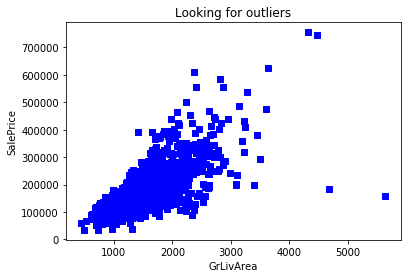

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(train.GrLivArea, train.SalePrice, c = "blue", marker = "s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")

In [0]:
train = train[train.GrLivArea < 4000]

# Log Transformation

We log transform the response variable to handle skewness in the response variable which can then be modeled better in linear models which like normal distributions since the variations will not be as extreme as skewed data. Thus this means that errors in predicting expensive houses and cheap houses will affect the result equally.

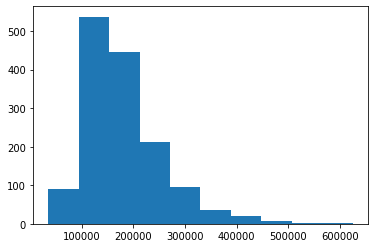

In [63]:
plt.hist(train.SalePrice);

In [0]:
train.SalePrice = np.log1p(train.SalePrice)
y = train.SalePrice

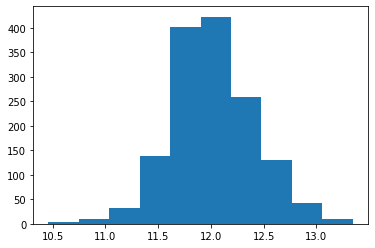

In [65]:
plt.hist(train.SalePrice);

# Handling Missing Values - Special Cases

In [0]:
# Alley : data description says NA means "no alley access"
train.loc[:, "Alley"] = train.loc[:, "Alley"].fillna("None")

# BedroomAbvGr : NA most likely means 0
train.loc[:, "BedroomAbvGr"] = train.loc[:, "BedroomAbvGr"].fillna(0)

# BsmtQual etc : data description says NA for basement features is "no basement"
train.loc[:, "BsmtQual"] = train.loc[:, "BsmtQual"].fillna("No")
train.loc[:, "BsmtCond"] = train.loc[:, "BsmtCond"].fillna("No")
train.loc[:, "BsmtExposure"] = train.loc[:, "BsmtExposure"].fillna("No")
train.loc[:, "BsmtFinType1"] = train.loc[:, "BsmtFinType1"].fillna("No")
train.loc[:, "BsmtFinType2"] = train.loc[:, "BsmtFinType2"].fillna("No")
train.loc[:, "BsmtFullBath"] = train.loc[:, "BsmtFullBath"].fillna(0)
train.loc[:, "BsmtHalfBath"] = train.loc[:, "BsmtHalfBath"].fillna(0)
train.loc[:, "BsmtUnfSF"] = train.loc[:, "BsmtUnfSF"].fillna(0)

# CentralAir : NA most likely means No
train.loc[:, "CentralAir"] = train.loc[:, "CentralAir"].fillna("N")

# Condition : NA most likely means Normal
train.loc[:, "Condition1"] = train.loc[:, "Condition1"].fillna("Norm")
train.loc[:, "Condition2"] = train.loc[:, "Condition2"].fillna("Norm")

# EnclosedPorch : NA most likely means no enclosed porch
train.loc[:, "EnclosedPorch"] = train.loc[:, "EnclosedPorch"].fillna(0)

# External stuff : NA most likely means average
train.loc[:, "ExterCond"] = train.loc[:, "ExterCond"].fillna("TA")
train.loc[:, "ExterQual"] = train.loc[:, "ExterQual"].fillna("TA")

# Fence : data description says NA means "no fence"
train.loc[:, "Fence"] = train.loc[:, "Fence"].fillna("No")

# FireplaceQu : data description says NA means "no fireplace"
train.loc[:, "FireplaceQu"] = train.loc[:, "FireplaceQu"].fillna("No")
train.loc[:, "Fireplaces"] = train.loc[:, "Fireplaces"].fillna(0)

# Functional : data description says NA means typical
train.loc[:, "Functional"] = train.loc[:, "Functional"].fillna("Typ")

# GarageType etc : data description says NA for garage features is "no garage"
train.loc[:, "GarageType"] = train.loc[:, "GarageType"].fillna("No")
train.loc[:, "GarageFinish"] = train.loc[:, "GarageFinish"].fillna("No")
train.loc[:, "GarageQual"] = train.loc[:, "GarageQual"].fillna("No")
train.loc[:, "GarageCond"] = train.loc[:, "GarageCond"].fillna("No")
train.loc[:, "GarageArea"] = train.loc[:, "GarageArea"].fillna(0)
train.loc[:, "GarageCars"] = train.loc[:, "GarageCars"].fillna(0)

# HalfBath : NA most likely means no half baths above grade
train.loc[:, "HalfBath"] = train.loc[:, "HalfBath"].fillna(0)

# HeatingQC : NA most likely means typical
train.loc[:, "HeatingQC"] = train.loc[:, "HeatingQC"].fillna("TA")

# KitchenAbvGr : NA most likely means 0
train.loc[:, "KitchenAbvGr"] = train.loc[:, "KitchenAbvGr"].fillna(0)

# KitchenQual : NA most likely means typical
train.loc[:, "KitchenQual"] = train.loc[:, "KitchenQual"].fillna("TA")

# LotFrontage : NA most likely means no lot frontage
train.loc[:, "LotFrontage"] = train.loc[:, "LotFrontage"].fillna(0)

# LotShape : NA most likely means regular
train.loc[:, "LotShape"] = train.loc[:, "LotShape"].fillna("Reg")

# MasVnrType : NA most likely means no veneer
train.loc[:, "MasVnrType"] = train.loc[:, "MasVnrType"].fillna("None")
train.loc[:, "MasVnrArea"] = train.loc[:, "MasVnrArea"].fillna(0)

# MiscFeature : data description says NA means "no misc feature"
train.loc[:, "MiscFeature"] = train.loc[:, "MiscFeature"].fillna("No")
train.loc[:, "MiscVal"] = train.loc[:, "MiscVal"].fillna(0)

# OpenPorchSF : NA most likely means no open porch
train.loc[:, "OpenPorchSF"] = train.loc[:, "OpenPorchSF"].fillna(0)

# PavedDrive : NA most likely means not paved
train.loc[:, "PavedDrive"] = train.loc[:, "PavedDrive"].fillna("N")

# PoolQC : data description says NA means "no pool"
train.loc[:, "PoolQC"] = train.loc[:, "PoolQC"].fillna("No")
train.loc[:, "PoolArea"] = train.loc[:, "PoolArea"].fillna(0)

# SaleCondition : NA most likely means normal sale
train.loc[:, "SaleCondition"] = train.loc[:, "SaleCondition"].fillna("Normal")

# ScreenPorch : NA most likely means no screen porch
train.loc[:, "ScreenPorch"] = train.loc[:, "ScreenPorch"].fillna(0)

# TotRmsAbvGrd : NA most likely means 0
train.loc[:, "TotRmsAbvGrd"] = train.loc[:, "TotRmsAbvGrd"].fillna(0)

# Utilities : NA most likely means all public utilities
train.loc[:, "Utilities"] = train.loc[:, "Utilities"].fillna("AllPub")

# WoodDeckSF : NA most likely means no wood deck
train.loc[:, "WoodDeckSF"] = train.loc[:, "WoodDeckSF"].fillna(0)

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1449 non-null int64
MSZoning         1449 non-null object
LotFrontage      1449 non-null float64
LotArea          1449 non-null int64
Street           1449 non-null object
Alley            1449 non-null object
LotShape         1449 non-null object
LandContour      1449 non-null object
Utilities        1449 non-null object
LotConfig        1449 non-null object
LandSlope        1449 non-null object
Neighborhood     1449 non-null object
Condition1       1449 non-null object
Condition2       1449 non-null object
BldgType         1449 non-null object
HouseStyle       1449 non-null object
OverallQual      1449 non-null int64
OverallCond      1449 non-null int64
YearBuilt        1449 non-null int64
YearRemodAdd     1449 non-null int64
RoofStyle        1449 non-null object
RoofMatl         1449 non-null object
Exterior1st      1449 non-null object
Exterior2nd      1449 no

# Simple Feature Engineering

In [0]:
# Some numerical features are actually really categories (assuming it is nominal)

train = train.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [0]:
# Encode some categorical features as ordinal when there is information in the order

train = train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

# Advanced Feature Engineering

## Simplifying Existing Features

In [0]:
train["SimplOverallQual"] = train.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })

train["SimplOverallCond"] = train.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })

train["SimplPoolQC"] = train.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })

train["SimplGarageCond"] = train.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })

train["SimplGarageQual"] = train.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })

train["SimplFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })

train["SimplFireplaceQu"] = train.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })

train["SimplFunctional"] = train.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })

train["SimplKitchenQual"] = train.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })

train["SimplHeatingQC"] = train.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

train["SimplBsmtFinType1"] = train.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })

train["SimplBsmtFinType2"] = train.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })

train["SimplBsmtCond"] = train.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })

train["SimplBsmtQual"] = train.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })

train["SimplExterCond"] = train.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

train["SimplExterQual"] = train.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

## New Features based on Feature Crosses \ Interactions

In [0]:
# Overall quality of the house
train["OverallGrade"] = train["OverallQual"] * train["OverallCond"]

# Overall quality of the garage
train["GarageGrade"] = train["GarageQual"] * train["GarageCond"]

# Overall quality of the exterior
train["ExterGrade"] = train["ExterQual"] * train["ExterCond"]

# Overall kitchen score
train["KitchenScore"] = train["KitchenAbvGr"] * train["KitchenQual"]

# Overall fireplace score
train["FireplaceScore"] = train["Fireplaces"] * train["FireplaceQu"]

# Overall garage score
train["GarageScore"] = train["GarageArea"] * train["GarageQual"]

# Overall pool score
train["PoolScore"] = train["PoolArea"] * train["PoolQC"]

# Simplified overall quality of the house
train["SimplOverallGrade"] = train["SimplOverallQual"] * train["SimplOverallCond"]

# Simplified overall quality of the exterior
train["SimplExterGrade"] = train["SimplExterQual"] * train["SimplExterCond"]

# Simplified overall pool score
train["SimplPoolScore"] = train["PoolArea"] * train["SimplPoolQC"]

# Simplified overall garage score
train["SimplGarageScore"] = train["GarageArea"] * train["SimplGarageQual"]

# Simplified overall fireplace score
train["SimplFireplaceScore"] = train["Fireplaces"] * train["SimplFireplaceQu"]

# Simplified overall kitchen score
train["SimplKitchenScore"] = train["KitchenAbvGr"] * train["SimplKitchenQual"]

# Total number of bathrooms
train["TotalBath"] = train["BsmtFullBath"] + (0.5 * train["BsmtHalfBath"]) + \
train["FullBath"] + (0.5 * train["HalfBath"])

# Total SF for house (incl. basement)
train["AllSF"] = train["GrLivArea"] + train["TotalBsmtSF"]

# Total SF for 1st + 2nd floors
train["AllFlrsSF"] = train["1stFlrSF"] + train["2ndFlrSF"]

# Total SF for porch
train["AllPorchSF"] = train["OpenPorchSF"] + train["EnclosedPorch"] + \
train["3SsnPorch"] + train["ScreenPorch"]

# Has masonry veneer or not
train["HasMasVnr"] = train.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})

# House completed before sale or not
train["BoughtOffPlan"] = train.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

## Polynomial Features on Important Features

In [72]:
print("Find most important features relative to SalePrice")
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice[:11])

Find most important features relative to SalePrice
SalePrice           1.000000
OverallQual         0.816535
AllSF               0.814009
AllFlrsSF           0.729217
GrLivArea           0.718465
SimplOverallQual    0.706771
ExterQual           0.677543
GarageCars          0.674370
TotalBath           0.673602
KitchenQual         0.662787
GarageScore         0.650761
Name: SalePrice, dtype: float64


In [0]:
train["OverallQual-s2"] = train["OverallQual"] ** 2
train["OverallQual-s3"] = train["OverallQual"] ** 3
train["OverallQual-Sq"] = np.sqrt(train["OverallQual"])
train["AllSF-2"] = train["AllSF"] ** 2
train["AllSF-3"] = train["AllSF"] ** 3
train["AllSF-Sq"] = np.sqrt(train["AllSF"])
train["AllFlrsSF-2"] = train["AllFlrsSF"] ** 2
train["AllFlrsSF-3"] = train["AllFlrsSF"] ** 3
train["AllFlrsSF-Sq"] = np.sqrt(train["AllFlrsSF"])
train["GrLivArea-2"] = train["GrLivArea"] ** 2
train["GrLivArea-3"] = train["GrLivArea"] ** 3
train["GrLivArea-Sq"] = np.sqrt(train["GrLivArea"])
train["SimplOverallQual-s2"] = train["SimplOverallQual"] ** 2
train["SimplOverallQual-s3"] = train["SimplOverallQual"] ** 3
train["SimplOverallQual-Sq"] = np.sqrt(train["SimplOverallQual"])
train["ExterQual-2"] = train["ExterQual"] ** 2
train["ExterQual-3"] = train["ExterQual"] ** 3
train["ExterQual-Sq"] = np.sqrt(train["ExterQual"])
train["GarageCars-2"] = train["GarageCars"] ** 2
train["GarageCars-3"] = train["GarageCars"] ** 3
train["GarageCars-Sq"] = np.sqrt(train["GarageCars"])
train["TotalBath-2"] = train["TotalBath"] ** 2
train["TotalBath-3"] = train["TotalBath"] ** 3
train["TotalBath-Sq"] = np.sqrt(train["TotalBath"])
train["KitchenQual-2"] = train["KitchenQual"] ** 2
train["KitchenQual-3"] = train["KitchenQual"] ** 3
train["KitchenQual-Sq"] = np.sqrt(train["KitchenQual"])
train["GarageScore-2"] = train["GarageScore"] ** 2
train["GarageScore-3"] = train["GarageScore"] ** 3
train["GarageScore-Sq"] = np.sqrt(train["GarageScore"])

# Missing Value Imputation 

In [74]:
train.isnull().sum().sort_values(ascending=False)

GarageYrBlt       74
Electrical         1
GarageScore-Sq     0
GrLivArea          0
BedroomAbvGr       0
                  ..
OverallGrade       0
SimplExterQual     0
SimplExterCond     0
SimplBsmtQual      0
MSSubClass         0
Length: 144, dtype: int64

In [0]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode())

In [0]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].median())

# One-hot encoding Categoricals

In [0]:
train = pd.get_dummies(train)

# Preparing Data for Modeling

In [78]:
print("New number of features : " + str(train.shape[1]))

New number of features : 323


In [79]:
train.dtypes[train.dtypes == 'float64'].index.tolist()

['LotFrontage',
 'MasVnrArea',
 'GarageYrBlt',
 'SalePrice',
 'TotalBath',
 'OverallQual-Sq',
 'AllSF-Sq',
 'AllFlrsSF-Sq',
 'GrLivArea-Sq',
 'SimplOverallQual-Sq',
 'ExterQual-Sq',
 'GarageCars-Sq',
 'TotalBath-2',
 'TotalBath-3',
 'TotalBath-Sq',
 'KitchenQual-Sq',
 'GarageScore-Sq']

In [80]:
train[train.dtypes[train.dtypes == 'int64'].index.tolist()].head()

,LotArea,Street,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,...,SimplBsmtCond,SimplBsmtQual,SimplExterCond,SimplExterQual,OverallGrade,GarageGrade,ExterGrade,KitchenScore,FireplaceScore,GarageScore,PoolScore,SimplOverallGrade,SimplExterGrade,SimplPoolScore,SimplGarageScore,SimplFireplaceScore,SimplKitchenScore,AllSF,AllFlrsSF,AllPorchSF,HasMasVnr,BoughtOffPlan,OverallQual-s2,OverallQual-s3,AllSF-2,AllSF-3,AllFlrsSF-2,AllFlrsSF-3,GrLivArea-2,GrLivArea-3,SimplOverallQual-s2,SimplOverallQual-s3,ExterQual-2,ExterQual-3,GarageCars-2,GarageCars-3,KitchenQual-2,KitchenQual-3,GarageScore-2,GarageScore-3
0,8450,2,4,4,3,7,5,2003,2003,4,3,4,0,6,706,1,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,2,548,3,3,2,...,1,2,1,2,35,9,12,4,0,1644,0,6,2,0,548,0,2,2566,1710,61,1,0,49,343,6584356,16895457496,2924100,5000211000,2924100,5000211000,9,27,16,64,4,8,16,64,2702736,4443297984
1,9600,2,4,4,3,6,8,1976,1976,3,3,4,3,5,978,1,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,2,460,3,3,2,...,1,2,1,1,48,9,9,3,3,1380,0,6,1,0,460,1,1,2524,1262,0,0,0,36,216,6370576,16079333824,1592644,2009916728,1592644,2009916728,4,8,9,27,4,8,9,27,1904400,2628072000
2,11250,2,3,4,3,7,5,2001,2002,4,3,4,1,6,486,1,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,2,608,3,3,2,...,1,2,1,2,35,9,12,4,3,1824,0,6,2,0,608,1,2,2706,1786,42,1,0,49,343,7322436,19814511816,3189796,5696975656,3189796,5696975656,9,27,16,64,4,8,16,64,3326976,6068404224
3,9550,2,3,4,3,7,5,1915,1970,3,3,3,0,5,216,1,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,3,642,3,3,2,...,2,1,1,1,35,9,9,4,4,1926,0,6,1,0,642,2,2,2473,1717,307,0,0,49,343,6115729,15124197817,2948089,5061868813,2948089,5061868813,9,27,9,27,9,27,16,64,3709476,7144450776
4,14260,2,3,4,3,8,5,2000,2000,4,3,4,2,6,655,1,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,3,836,3,3,2,...,1,2,1,2,40,9,12,4,3,2508,0,6,2,0,836,1,2,3343,2198,84,1,0,64,512,11175649,37360194607,4831204,10618986392,4831204,10618986392,9,27,16,64,9,27,16,64,6290064,15775480512


In [0]:
y = train['SalePrice']
train = train.drop(columns=["SalePrice"])

In [0]:
num_cols = list(set(["LotArea", "YearBuilt", "YearRemodAdd", "BsmtFinSF1", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", 
            "2ndFlrSF", "GrLivArea", "GarageArea", "OverallGrade", "OverallQual-s2", "OverallQual-s3", 
            "OverallQual-Sq", "AllSF-2", "AllSF-3", "AllSF-Sq", 
            "AllFlrsSF-2", "AllFlrsSF-3", "AllFlrsSF-Sq", "GrLivArea-2", "GrLivArea-3", 
            "GrLivArea-Sq", "SimplOverallQual-s2", "SimplOverallQual-s3", "SimplOverallQual-Sq", 
            "ExterQual-2", "ExterQual-3",  "ExterQual-Sq", "GarageCars-2", "GarageCars-3", 
            "GarageCars-Sq", "TotalBath-2",  "TotalBath-3", "TotalBath-Sq", "KitchenQual-2", 
            "KitchenQual-3", "KitchenQual-Sq", "GarageScore-2", "GarageScore-3", "GarageScore-Sq",
            'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'TotalBath', 'OverallQual-Sq',
            'AllSF-Sq', 'AllFlrsSF-Sq', 'GrLivArea-Sq', 'SimplOverallQual-Sq', 'ExterQual-Sq', 'GarageCars-Sq',
            'TotalBath-2', 'TotalBath-3', 'TotalBath-Sq', 'KitchenQual-Sq', 'GarageScore-Sq']))



categorical_cols = list(set(train.columns) - set(num_cols))
train_num = train[num_cols]
train_cat = train[categorical_cols]

In [83]:
from sklearn.model_selection import train_test_split

train_dataset = pd.concat([train_num, train_cat], axis=1)
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train_dataset, y, test_size = 0.3, random_state=0)

print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1014, 322)
X_test : (435, 322)
y_train : (1014,)
y_test : (435,)


# Model Tuning

Here we will explore both Grid Search and Randomized Search

![](https://i.imgur.com/TfPomFj.png)

# Vanilla Random Forest Model

In [84]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=0)
rfr.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
print('R-sq:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq orig price:', r2_score(y_test_exp, y_pred_exp))
print('MSE orig price:', mean_squared_error(y_test_exp, y_pred_exp))
print('RMSE orig price:', np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


R-sq: 0.8615068616216848
MSE: 0.02126891269341367
RMSE: 0.14583865294706225
--------------------------------------------------
R-sq orig price: 0.8796818232824989
MSE orig price: 659388093.2931986
RMSE orig price: 25678.553177568214


# Grid Search based Tuning

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# define the search space.
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 100, 150],
    'max_features': ['auto'],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [100, 200, 500, 1000]}

# make scorer
mse = make_scorer(mean_squared_error, greater_is_better=False)

# Configure the GridSearch model
model = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=1, cv=3, scoring=mse, verbose=2)

# Training
model.fit(X_train, y_train)

print('Random forest regression...')
print('Best Params:', model.best_params_)
print('Best CV Score:', -model.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   2.3s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   2.3s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   2.2s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   4.6s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   4.5s
[CV] bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=50, 

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  6.2min finished


Random forest regression...
Best Params: {'bootstrap': True, 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
Best CV Score: 0.018347369406184436


In [90]:
y_pred = model.predict(X_test)
print('R-sq:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq orig price:', r2_score(y_test_exp, y_pred_exp))
print('MSE orig price:', mean_squared_error(y_test_exp, y_pred_exp))
print('RMSE orig price:', np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))

R-sq: 0.8795325816159748
MSE: 0.018500635006275162
RMSE: 0.1360170393968166
--------------------------------------------------
R-sq orig price: 0.894471615103172
MSE orig price: 578334565.9302087
RMSE orig price: 24048.587607803678


# Randomized Search based Tuning

In [95]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 30, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 150, num = 10)]


# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'bootstrap': [True],
 'max_depth': [10, 25, 41, 56, 72, 87, 103, 118, 134, 150],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [30, 137, 245, 353, 461, 568, 676, 784, 892, 1000]}

In [96]:
# make scorer
mse = make_scorer(mean_squared_error, greater_is_better=False)

# Configure the GridSearch model
rs_model = RandomizedSearchCV(estimator=rfr, param_distributions = random_grid, n_iter = 30, n_jobs=1, 
                           cv=3, scoring=mse, random_state=0, verbose=2)

# Training
rs_model.fit(X_train, y_train)

print('Random forest regression...')
print('Best Params:', rs_model.best_params_)
print('Best CV Score:', -rs_model.best_score_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] n_estimators=245, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=245, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=True, total=   4.3s
[CV] n_estimators=245, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s


[CV]  n_estimators=245, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=True, total=   4.2s
[CV] n_estimators=245, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=True 
[CV]  n_estimators=245, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=True, total=   4.1s
[CV] n_estimators=137, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=25, bootstrap=True 
[CV]  n_estimators=137, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=25, bootstrap=True, total=   2.1s
[CV] n_estimators=137, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=25, bootstrap=True 
[CV]  n_estimators=137, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=25, bootstrap=True, total=   2.1s
[CV] n_estimators=137, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=25, bootstrap=True 
[CV]  n_estimators=137, min_sam

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 11.0min finished


Random forest regression...
Best Params: {'n_estimators': 245, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 56, 'bootstrap': True}
Best CV Score: 0.018312376259584786


In [97]:
y_pred = rs_model.predict(X_test)
print('R-sq:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

y_test_exp = np.expm1(y_test)
y_pred_exp = np.expm1(y_pred)
print('-'*50)
print('R-sq orig price:', r2_score(y_test_exp, y_pred_exp))
print('MSE orig price:', mean_squared_error(y_test_exp, y_pred_exp))
print('RMSE orig price:', np.sqrt(mean_squared_error(y_test_exp, y_pred_exp)))

R-sq: 0.8798578136370664
MSE: 0.018450687900283504
RMSE: 0.1358333092443952
--------------------------------------------------
R-sq orig price: 0.8943945780265645
MSE orig price: 578756757.5927069
RMSE orig price: 24057.363895337887
